## Hypothesis 1 : Average monthly temperature in Corpus Christi over 30 years follows a normal distribution.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from scipy.stats import probplot
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import ttest_rel


Reading Data From : https://climate.northwestknowledge.net/NWTOOLBOX/formattedDownloads.php

In [ ]:
temp_df = pd.read_csv("/content/corpus_christi_temp_data.csv",header=0, parse_dates=True, skiprows= 9)

In [ ]:
temp_df

,Year,Month,Day,tmmn(degC),tmmx(degC)
0,1994,1,1,12.75,22.85
1,1994,1,2,9.75,23.95
2,1994,1,3,6.25,18.45
3,1994,1,4,6.45,20.65
4,1994,1,5,5.65,20.25
...,...,...,...,...,...
10983,2024,1,27,10.15,19.15
10984,2024,1,28,8.45,19.45
10985,2024,1,29,7.75,20.45
10986,2024,1,30,10.05,21.05


Adding date column


In [ ]:
temp_df['Date'] = pd.to_datetime(temp_df[['Year', 'Month', 'Day']])

In [ ]:
temp_df.set_index('Date', inplace=True)
temp_df

,Year,Month,Day,tmmn(degC),tmmx(degC)
Date,,,,,
1994-01-01,1994,1,1,12.75,22.85
1994-01-02,1994,1,2,9.75,23.95
1994-01-03,1994,1,3,6.25,18.45
1994-01-04,1994,1,4,6.45,20.65
1994-01-05,1994,1,5,5.65,20.25
...,...,...,...,...,...
2024-01-27,2024,1,27,10.15,19.15
2024-01-28,2024,1,28,8.45,19.45
2024-01-29,2024,1,29,7.75,20.45


#Plotting Histogram for Monthly average of tmin, tmax over 30 years(Jan 1994- Jan 2024)

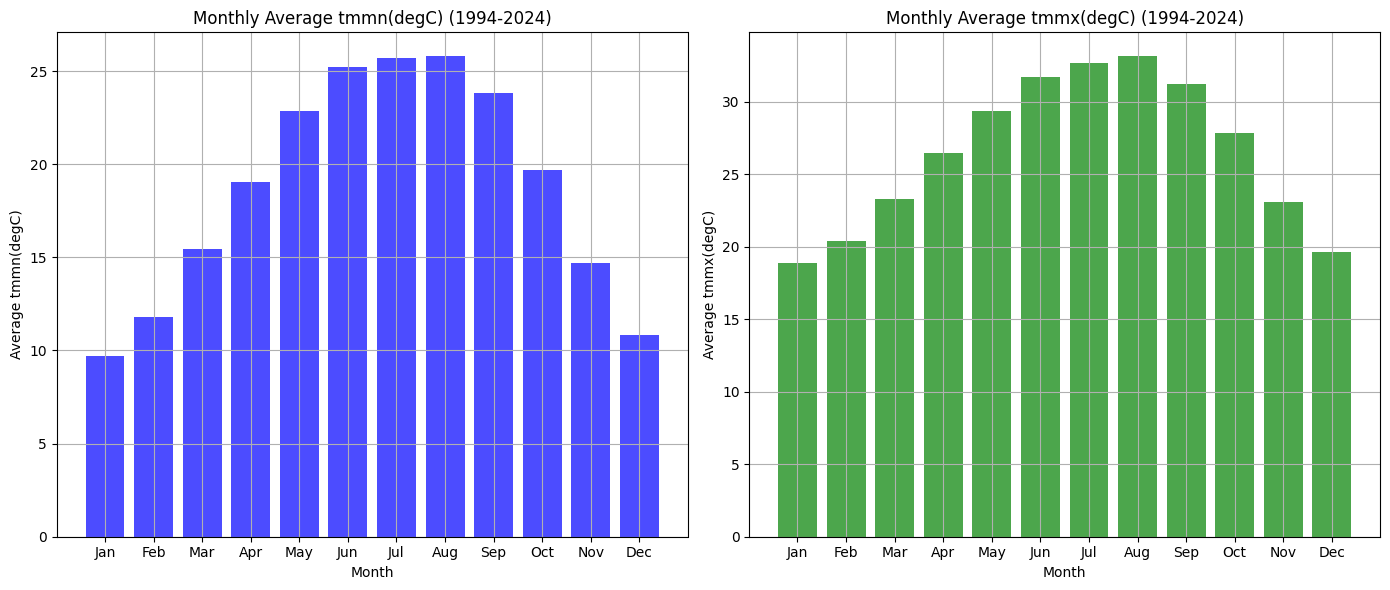

In [ ]:
# Calculate monthly means for tmmn and tmmx
monthly_means_tmmn = temp_df.groupby('Month')['tmmn(degC)'].mean()
monthly_means_tmmx = temp_df.groupby('Month')['tmmx(degC)'].mean()

# Plot histograms for tmmn and tmmx
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(monthly_means_tmmn.index, monthly_means_tmmn, color='blue', alpha=0.7)
plt.title('Monthly Average tmmn(degC) (1994-2024)')
plt.xlabel('Month')
plt.ylabel('Average tmmn(degC)')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(monthly_means_tmmx.index, monthly_means_tmmx, color='green', alpha=0.7)
plt.title('Monthly Average tmmx(degC) (1994-2024)')
plt.xlabel('Month')
plt.ylabel('Average tmmx(degC)')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.tight_layout()
plt.show()

#Plotting Q-Q Plot for Monthly average of tmin, tmax over 30 years(Jan 1994- Jan 2024)

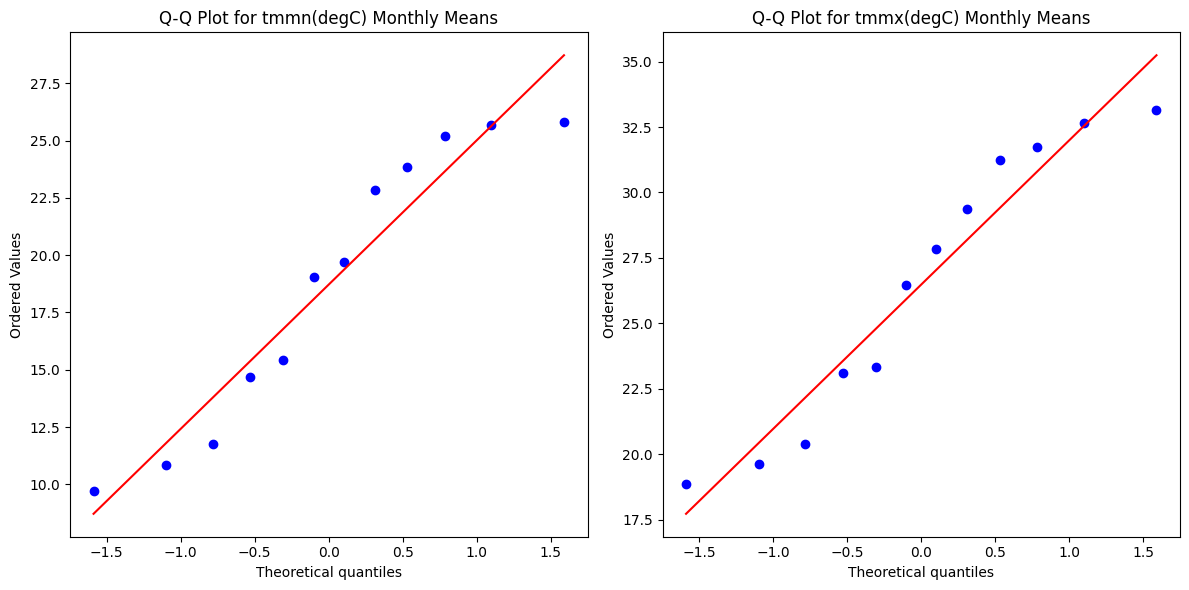

In [ ]:
# Calculate monthly means for 'tmmn(degC)' and 'tmmx(degC)'
monthly_means_tmmn = temp_df.groupby('Month')['tmmn(degC)'].mean()
monthly_means_tmmx = temp_df.groupby('Month')['tmmx(degC)'].mean()

# Create Q-Q plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
probplot(monthly_means_tmmn, plot=plt, dist='norm')
plt.title('Q-Q Plot for tmmn(degC) Monthly Means')

plt.subplot(1, 2, 2)
probplot(monthly_means_tmmx, plot=plt, dist='norm')
plt.title('Q-Q Plot for tmmx(degC) Monthly Means')

plt.tight_layout()
plt.show()


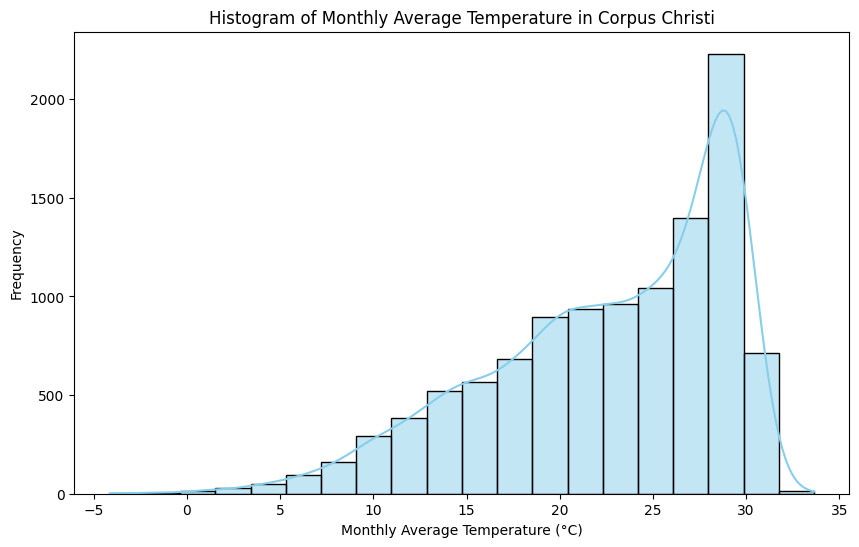

In [ ]:
# Calculate monthly averages for temperature (assuming columns are 'tmmn(degC)' and 'tmmx(degC)')
temp_df['Monthly_Avg'] = temp_df[['tmmn(degC)', 'tmmx(degC)']].mean(axis=1)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(temp_df['Monthly_Avg'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Monthly Average Temperature in Corpus Christi')
plt.xlabel('Monthly Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


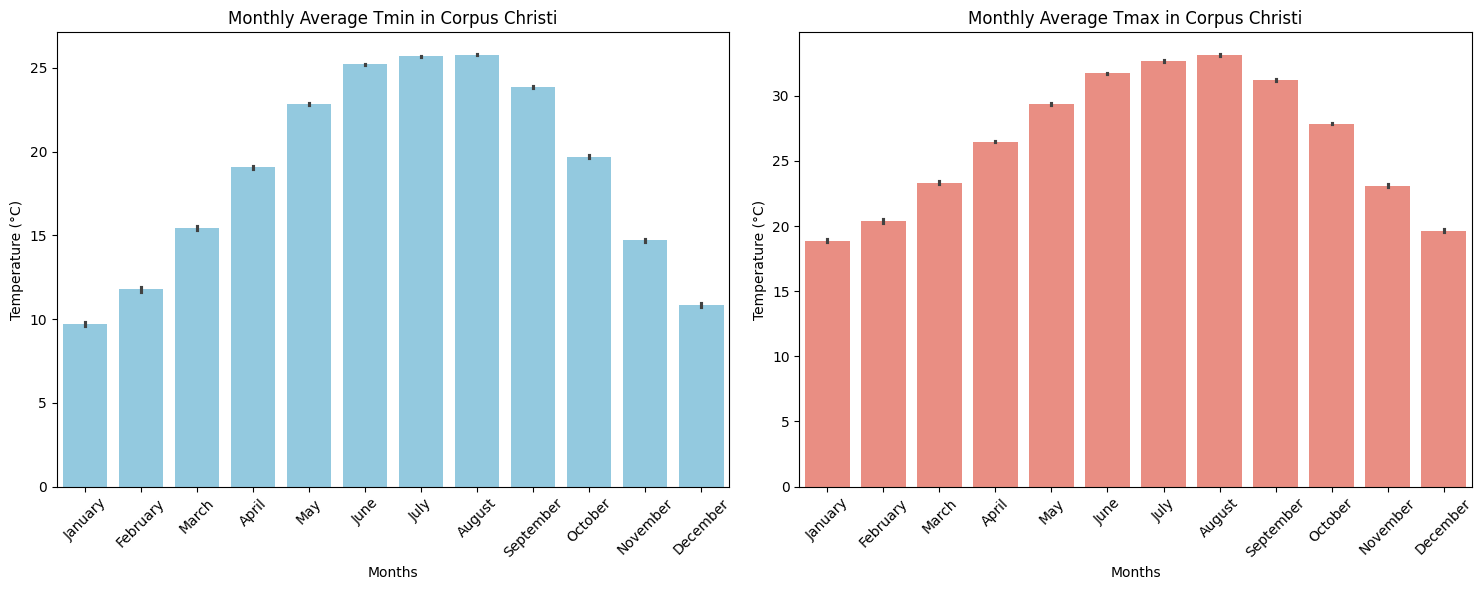

In [ ]:
# Calculate monthly averages for Tmin and Tmax
temp_df['Tmin_Monthly_Avg'] = temp_df.groupby(['Year', 'Month'])['tmmn(degC)'].transform('mean')
temp_df['Tmax_Monthly_Avg'] = temp_df.groupby(['Year', 'Month'])['tmmx(degC)'].transform('mean')

# Plot histograms for Tmin and Tmax
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=temp_df['Date'].dt.month_name(), y=temp_df['Tmin_Monthly_Avg'], color='skyblue')
plt.title('Monthly Average Tmin in Corpus Christi')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.subplot(1, 2, 2)
sns.barplot(x=temp_df['Date'].dt.month_name(), y=temp_df['Tmax_Monthly_Avg'], color='salmon')
plt.title('Monthly Average Tmax in Corpus Christi')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


# Plotting Histogram for each month of tmin and tmax

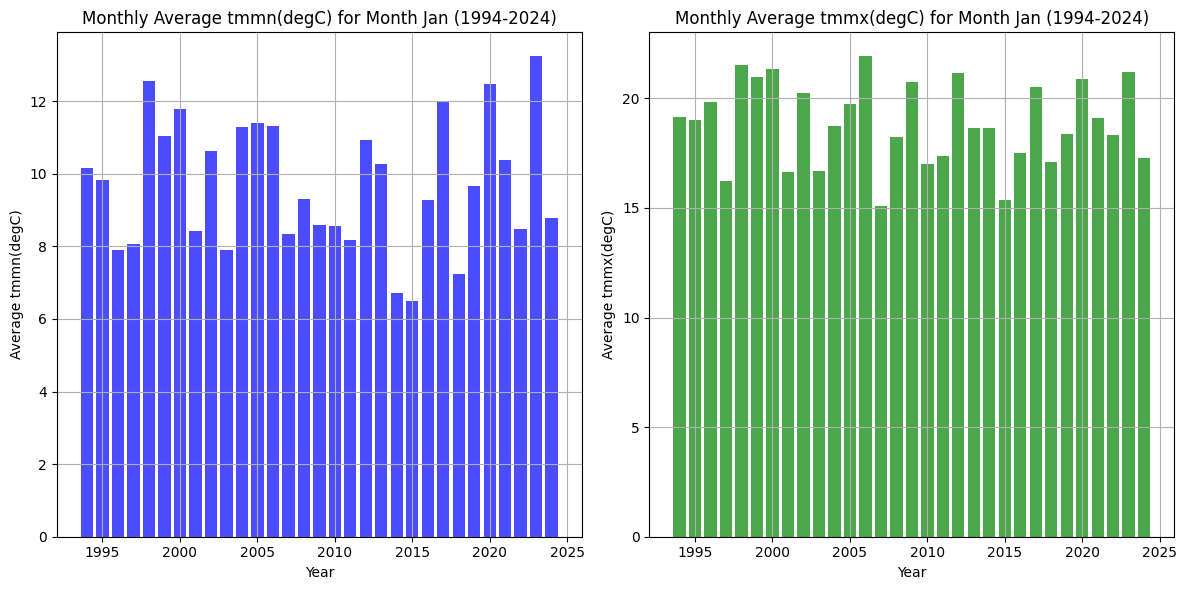

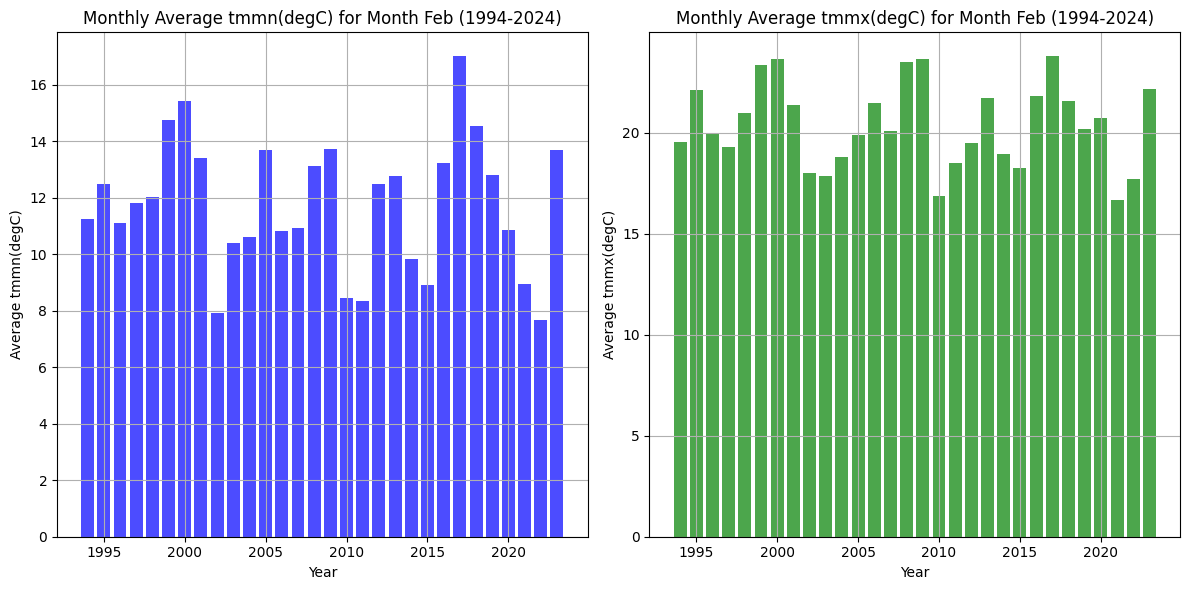

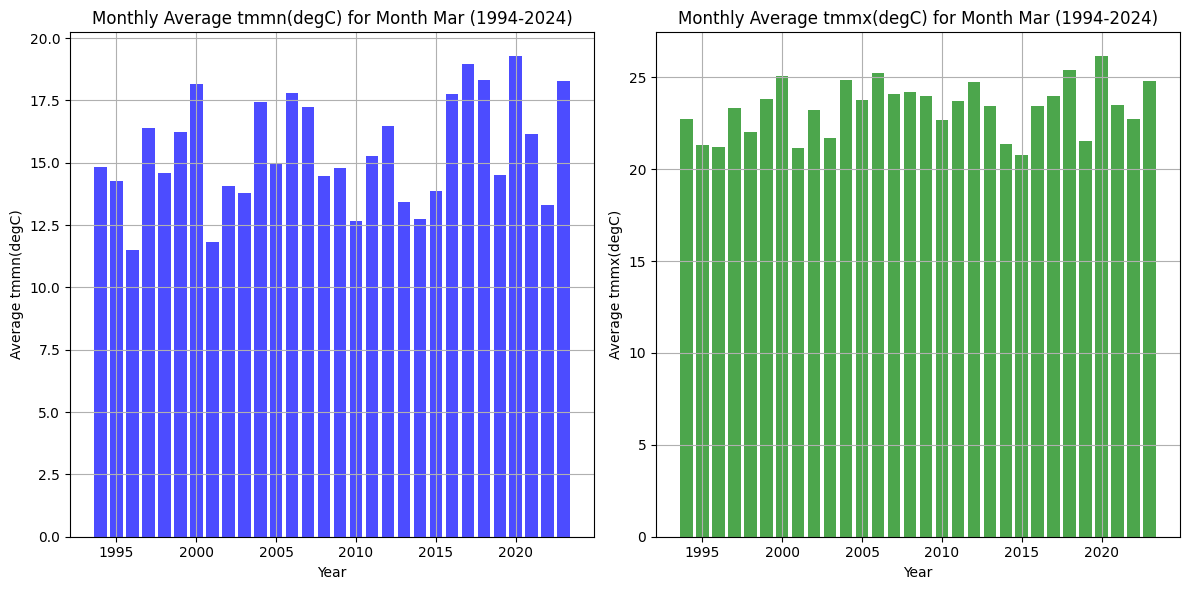

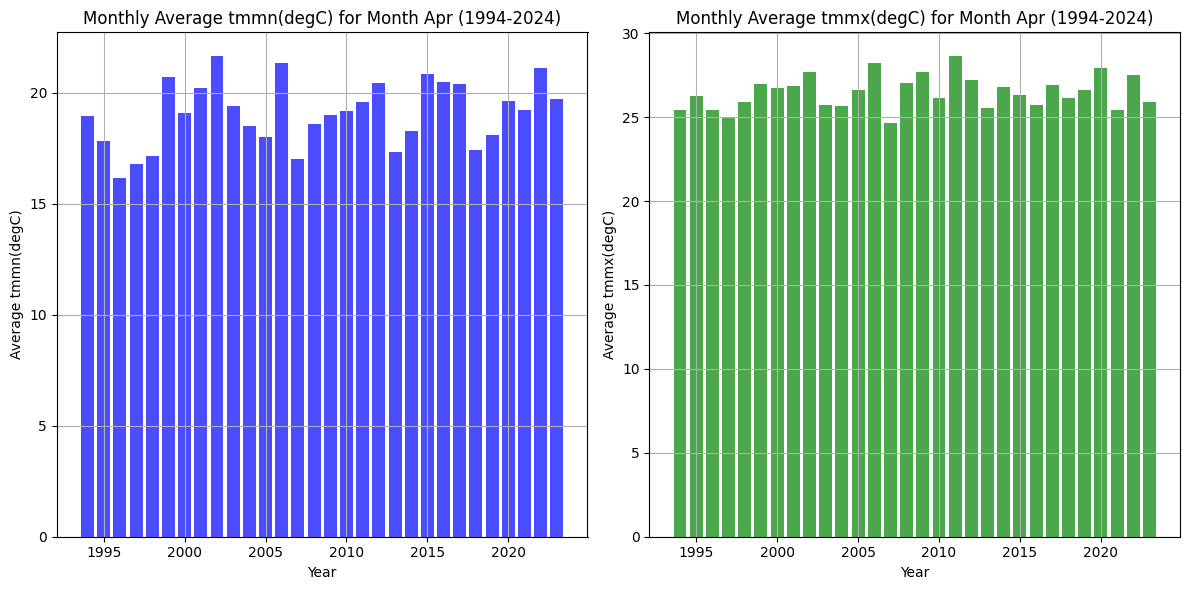

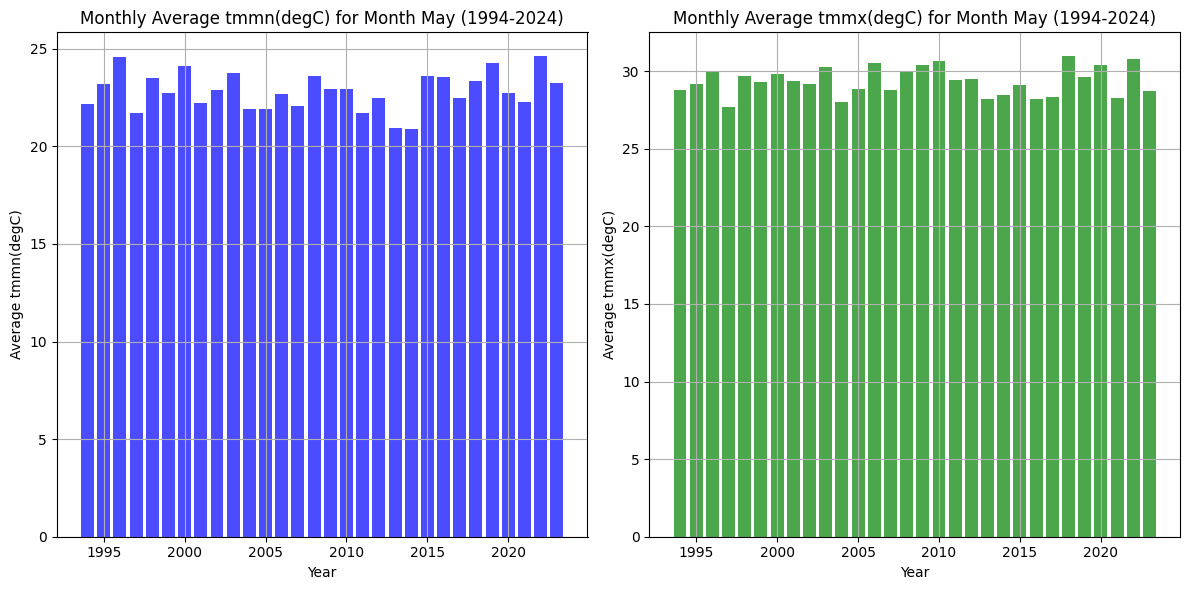

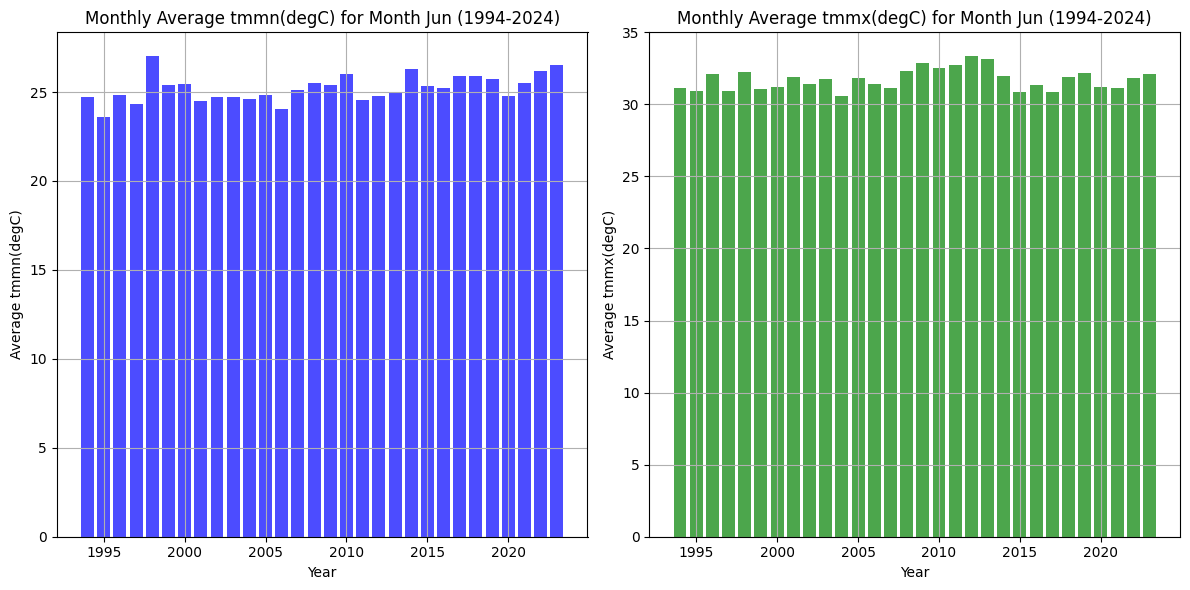

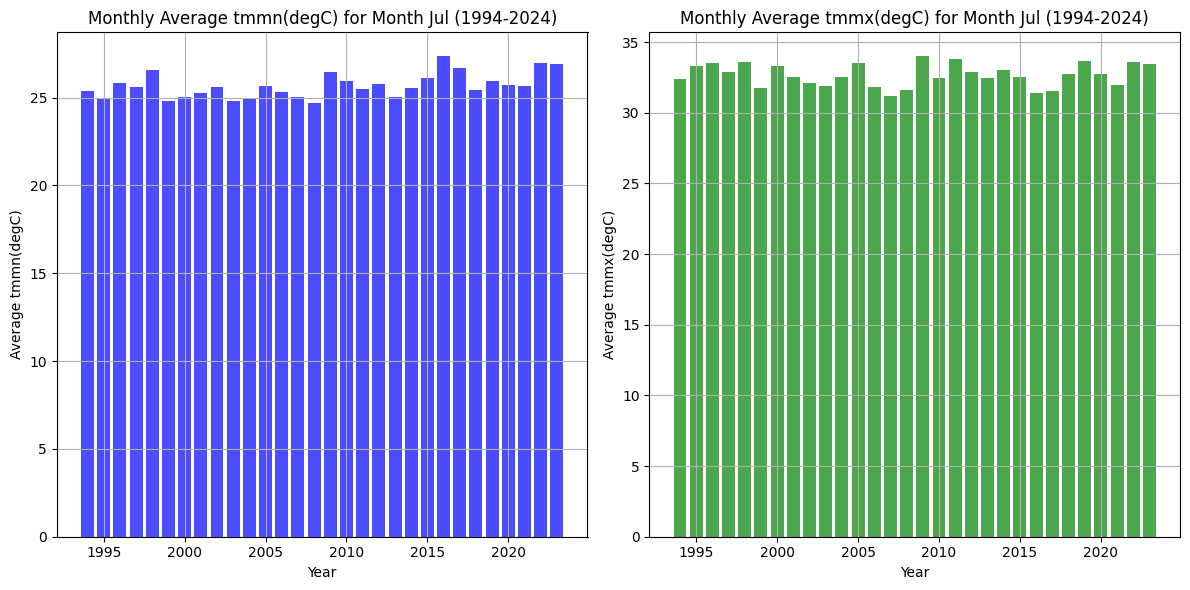

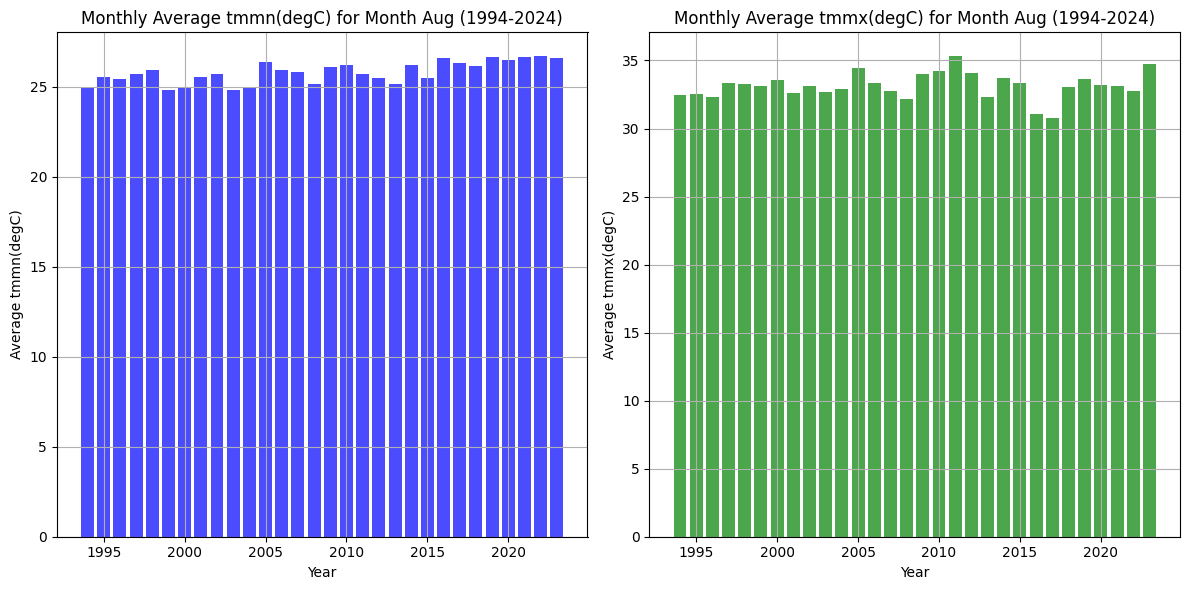

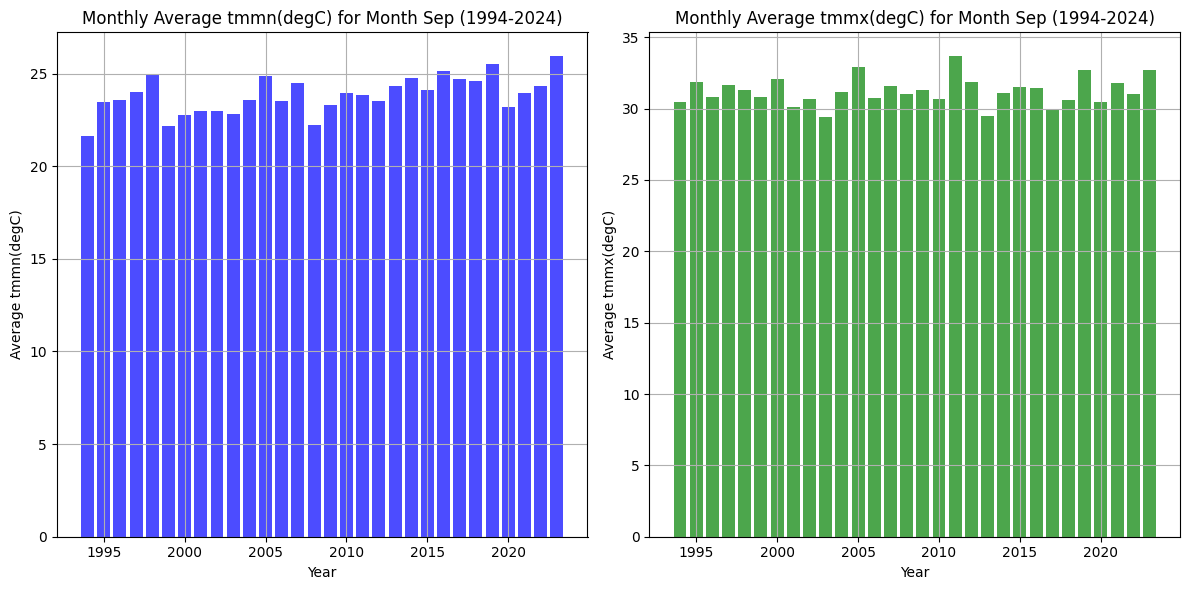

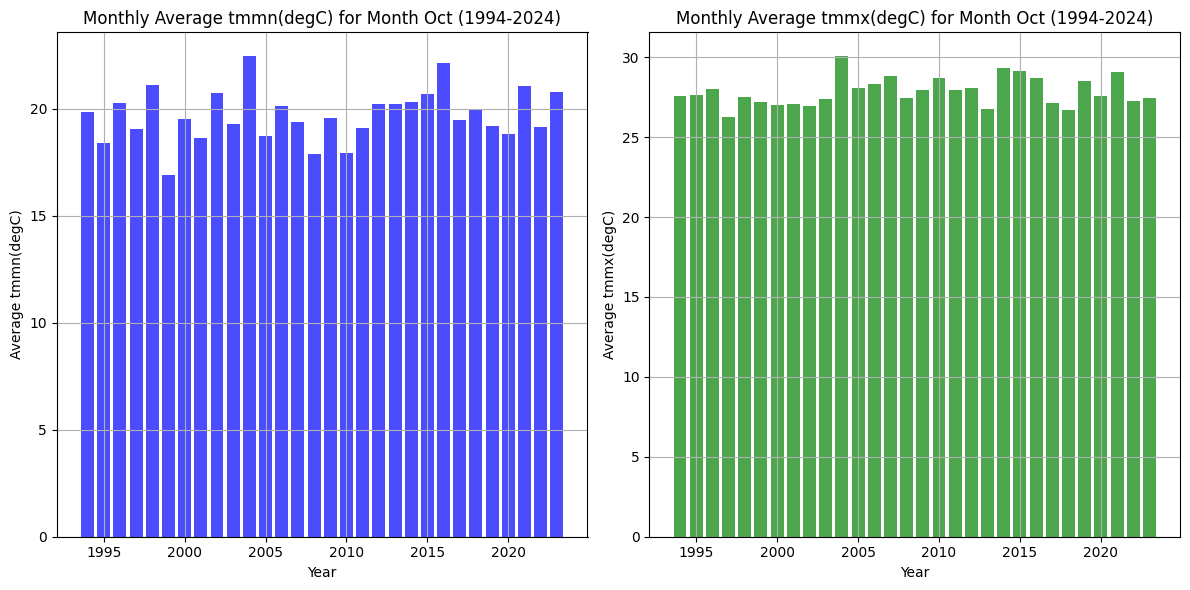

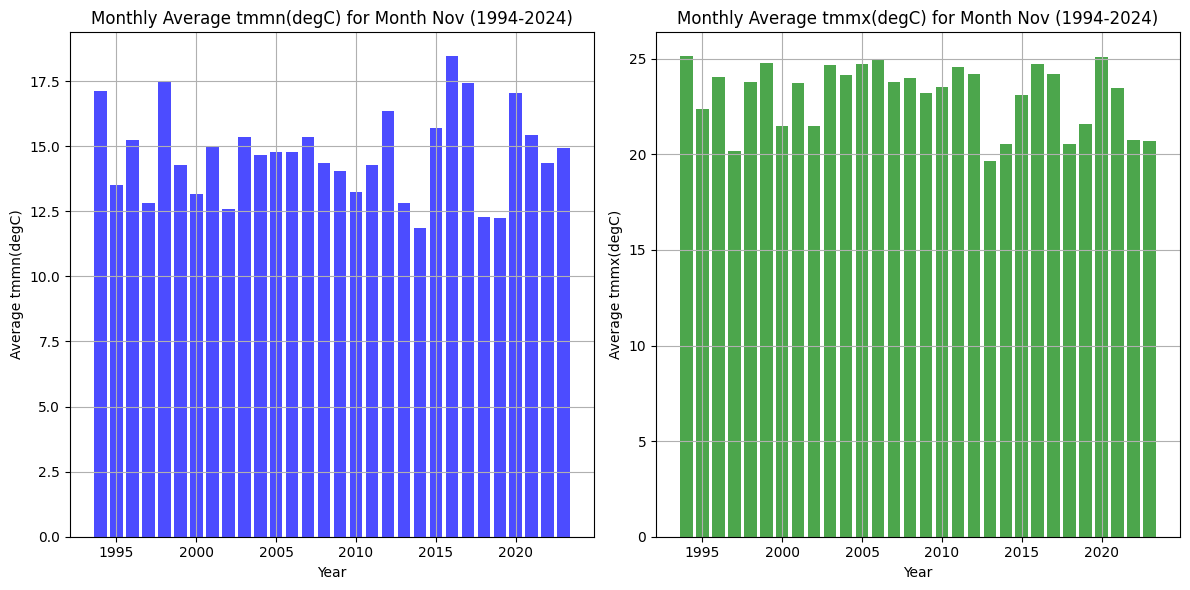

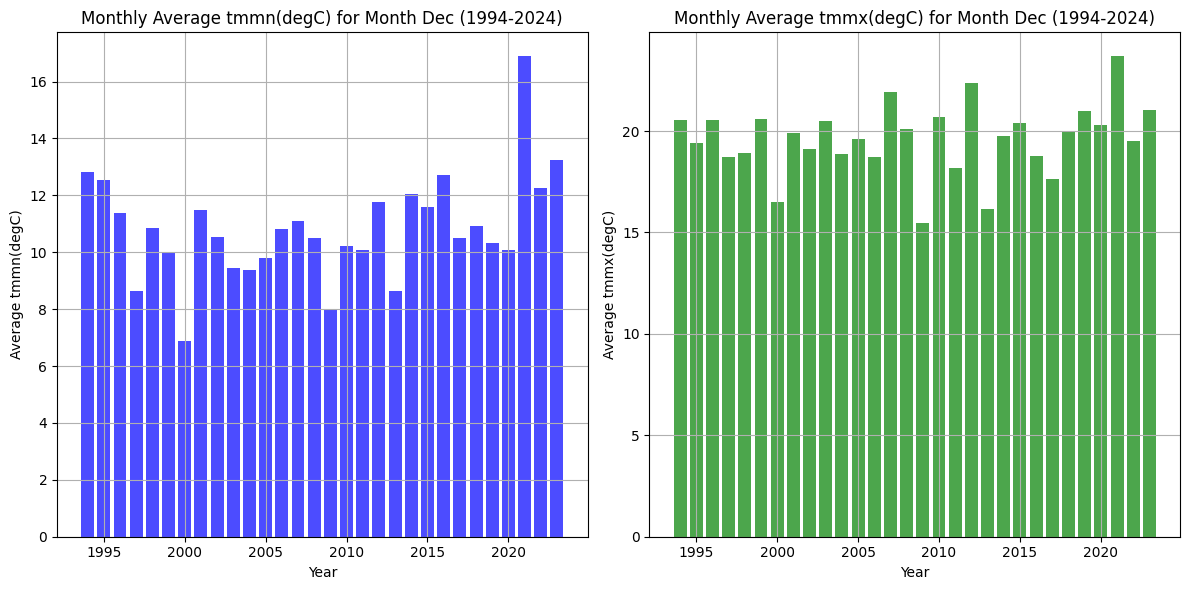

In [ ]:
# Iterate through each month and create histograms for 'tmmn(degC)' and 'tmmx(degC)'
for month in range(1, 13):
    # Filter data for the current month
    monthly_data = temp_df[temp_df.index.month == month]

    # Calculate monthly means for 'tmmn(degC)' and 'tmmx(degC)'
    monthly_means_tmmn = monthly_data.groupby('Year')['tmmn(degC)'].mean()
    monthly_means_tmmx = monthly_data.groupby('Year')['tmmx(degC)'].mean()

    # Plot histograms for 'tmmn(degC)' and 'tmmx(degC)'
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(monthly_means_tmmn.index, monthly_means_tmmn, color='blue', alpha=0.7)
    plt.title(f'Monthly Average tmmn(degC) for Month {calendar.month_abbr[month]} (1994-2024)')
    plt.xlabel('Year')
    plt.ylabel('Average tmmn(degC)')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.bar(monthly_means_tmmx.index, monthly_means_tmmx, color='green', alpha=0.7)
    plt.title(f'Monthly Average tmmx(degC) for Month {calendar.month_abbr[month]} (1994-2024)')
    plt.xlabel('Year')
    plt.ylabel('Average tmmx(degC)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


#ANOVA Test

In [ ]:
# Separate data for 'tmmn(degC)' and 'tmmx(degC)'
tmmn_data = temp_df.groupby(['Year', 'Month'])['tmmn(degC)'].mean()
tmmx_data = temp_df.groupby(['Year', 'Month'])['tmmx(degC)'].mean()

# Perform one-way ANOVA for 'tmmn(degC)'
f_statistic_tmmn, p_value_tmmn = f_oneway(*[group[1] for group in tmmn_data.groupby('Month')])

# Perform one-way ANOVA for 'tmmx(degC)'
f_statistic_tmmx, p_value_tmmx = f_oneway(*[group[1] for group in tmmx_data.groupby('Month')])

# Print the results
print(f'ANOVA Results for tmmn(degC):')
print(f'F-statistic: {f_statistic_tmmn}')
print(f'P-value: {p_value_tmmn}')

print('\n')

print(f'ANOVA Results for tmmx(degC):')
print(f'F-statistic: {f_statistic_tmmx}')
print(f'P-value: {p_value_tmmx}')

# Interpret the results
alpha = 0.05
if p_value_tmmn < alpha:
    print("Reject the null hypothesis for tmmn(degC): There is a significant difference across months.")
else:
    print("Fail to reject the null hypothesis for tmmn(degC): No significant difference across months.")

print('\n')

if p_value_tmmx < alpha:
    print("Reject the null hypothesis for tmmx(degC): There is a significant difference across months.")
else:
    print("Fail to reject the null hypothesis for tmmx(degC): No significant difference across months.")


ANOVA Results for tmmn(degC):
F-statistic: 496.58308251273377
P-value: 1.3654231298571833e-205


ANOVA Results for tmmx(degC):
F-statistic: 464.39463945132775
P-value: 7.7834695451108e-201
Reject the null hypothesis for tmmn(degC): There is a significant difference across months.


Reject the null hypothesis for tmmx(degC): There is a significant difference across months.


ANOVA Results:
ANOVA Results for tmmn(degC): The extremely low p-value suggests that there is a significant difference in the mean temperatures across months for 'tmmn(degC)'.

ANOVA Results for tmmx(degC):
Similarly, the extremely low p-value indicates a significant difference in the mean temperatures across months for 'tmmx(degC)'.


Since the p-values are much smaller than 0.05, we reject the null hypothesis in both cases. Therefore, we conclude that there is a significant difference in mean temperatures across different months for both 'tmmn(degC)' and 'tmmx(degC)'.

# Paired t-test

In [ ]:
# Separate data for 'tmin' and 'tmax'
tmin_data = temp_df.groupby(['Year', 'Month'])['tmmn(degC)'].mean()
tmax_data = temp_df.groupby(['Year', 'Month'])['tmmx(degC)'].mean()

# Perform paired t-test
t_statistic, p_value = ttest_rel(tmin_data, tmax_data)

# Print the results
print(f'Paired t-test Results:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between tmin and tmax.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between tmin and tmax.")


Paired t-test Results:
T-statistic: -104.77941908060363
P-value: 8.776728926130377e-272
Reject the null hypothesis: There is a significant difference between tmin and tmax.


Paired t-test Result:
The paired t-test results indicate a significant difference between 'tmin' and 'tmax'.

T-statistic: The t-statistic is a measure of how many standard deviations the means of two groups are apart. In this case, the t-statistic is approximately -104.78.

P-value: The p-value is the probability of observing a t-statistic as extreme as the one calculated, assuming that the null hypothesis (no difference between 'tmin' and 'tmax') is true. The extremely low p-value (close to zero and in scientific notation, indicates strong evidence against the null hypothesis.

With such a low p-value, you reject the null hypothesis. Therefore, you can conclude that there is a statistically significant difference between the monthly average temperatures of 'tmin' and 'tmax'. In practical terms, it suggests that the temperatures measured as 'tmin' and 'tmax' are not likely to come from the same distribution; there is a meaningful difference between them.
